Here we would like to test the Hypothesis, whether our clusters (districts by finansing) have a significant impact on graduation rates (i.e.,dependent variable would be "graduation rate" and independent variable would be "cluster")

In this case we will use ANOVA 

H0: There is no significant difference in graduation rates between clusters
HA: There is a significant difference in graduation rates between clusters

Caution: The following code have not been tested on the real dataframe and at this point is just schema of the future research!

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
#import numpy_indexed as npi

In [2]:
#oped the data frame
df= pd.read_csv("Sources/df_clustered.csv")
df


,Unnamed: 0,CDS_CODE,Year,ETHNIC,GR_12,ENR_TOTAL,GRADS,UC_GRADS,Function_Attendance and Social Work Services,Function_Centralized Data Processing,...,Function_Special Education: Supplemental Aids & Services in Regular Classrooms,Amount_<500k,Amount_500k-1500k,Amount_1500k-3000k,Amount_3000k-10000k,Amount_>10000k,principal component 1,principal component 2,principal component 3,Cluster
0,0,110017,1213,37,262,1654,221,81,0.0,0.0,...,0.0,1,0,0,0,0,-1.276377,1.627551,-0.047944,2
1,1,110017,1213,37,262,1654,221,81,0.0,0.0,...,0.0,1,0,0,0,0,-1.276377,1.627551,-0.047944,2
2,2,110017,1213,37,262,1654,221,81,1.0,0.0,...,0.0,1,0,0,0,0,-1.232554,0.877664,-0.095576,2
3,3,110017,1213,37,262,1654,221,81,0.0,0.0,...,0.0,1,0,0,0,0,-1.276377,1.627551,-0.047944,2
4,4,110017,1213,37,262,1654,221,81,0.0,1.0,...,0.0,0,1,0,0,0,-1.045100,-0.891666,-0.730700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,9047,5772710,1516,34,1408,20202,1276,490,0.0,0.0,...,0.0,0,0,0,1,0,0.238431,-1.480982,-1.668784,0
9048,9048,5772710,1516,34,1408,20202,1276,490,0.0,0.0,...,0.0,0,0,0,0,1,1.056545,-1.435308,2.625652,3
9049,9049,5772710,1516,34,1408,20202,1276,490,0.0,0.0,...,1.0,0,0,0,1,0,0.246042,-1.329192,-2.049255,0
9050,9050,5772710,1516,34,1408,20202,1276,490,0.0,0.0,...,0.0,0,0,0,1,0,0.284962,0.149316,-1.368431,0


In [3]:
#Drop column Unnamed: 0
df = df.drop(columns = ['Unnamed: 0'])
df

,CDS_CODE,Year,ETHNIC,GR_12,ENR_TOTAL,GRADS,UC_GRADS,Function_Attendance and Social Work Services,Function_Centralized Data Processing,Function_Food Services,...,Function_Special Education: Supplemental Aids & Services in Regular Classrooms,Amount_<500k,Amount_500k-1500k,Amount_1500k-3000k,Amount_3000k-10000k,Amount_>10000k,principal component 1,principal component 2,principal component 3,Cluster
0,110017,1213,37,262,1654,221,81,0.0,0.0,0.0,...,0.0,1,0,0,0,0,-1.276377,1.627551,-0.047944,2
1,110017,1213,37,262,1654,221,81,0.0,0.0,0.0,...,0.0,1,0,0,0,0,-1.276377,1.627551,-0.047944,2
2,110017,1213,37,262,1654,221,81,1.0,0.0,0.0,...,0.0,1,0,0,0,0,-1.232554,0.877664,-0.095576,2
3,110017,1213,37,262,1654,221,81,0.0,0.0,0.0,...,0.0,1,0,0,0,0,-1.276377,1.627551,-0.047944,2
4,110017,1213,37,262,1654,221,81,0.0,1.0,0.0,...,0.0,0,1,0,0,0,-1.045100,-0.891666,-0.730700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,5772710,1516,34,1408,20202,1276,490,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0.238431,-1.480982,-1.668784,0
9048,5772710,1516,34,1408,20202,1276,490,0.0,0.0,0.0,...,0.0,0,0,0,0,1,1.056545,-1.435308,2.625652,3
9049,5772710,1516,34,1408,20202,1276,490,0.0,0.0,0.0,...,1.0,0,0,0,1,0,0.246042,-1.329192,-2.049255,0
9050,5772710,1516,34,1408,20202,1276,490,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0.284962,0.149316,-1.368431,0


In [4]:
#Calculate Graduation rate
df['GR_RATE'] = df.UC_GRADS/df.GR_12
df

,CDS_CODE,Year,ETHNIC,GR_12,ENR_TOTAL,GRADS,UC_GRADS,Function_Attendance and Social Work Services,Function_Centralized Data Processing,Function_Food Services,...,Amount_<500k,Amount_500k-1500k,Amount_1500k-3000k,Amount_3000k-10000k,Amount_>10000k,principal component 1,principal component 2,principal component 3,Cluster,GR_RATE
0,110017,1213,37,262,1654,221,81,0.0,0.0,0.0,...,1,0,0,0,0,-1.276377,1.627551,-0.047944,2,0.309160
1,110017,1213,37,262,1654,221,81,0.0,0.0,0.0,...,1,0,0,0,0,-1.276377,1.627551,-0.047944,2,0.309160
2,110017,1213,37,262,1654,221,81,1.0,0.0,0.0,...,1,0,0,0,0,-1.232554,0.877664,-0.095576,2,0.309160
3,110017,1213,37,262,1654,221,81,0.0,0.0,0.0,...,1,0,0,0,0,-1.276377,1.627551,-0.047944,2,0.309160
4,110017,1213,37,262,1654,221,81,0.0,1.0,0.0,...,0,1,0,0,0,-1.045100,-0.891666,-0.730700,0,0.309160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,5772710,1516,34,1408,20202,1276,490,0.0,0.0,0.0,...,0,0,0,1,0,0.238431,-1.480982,-1.668784,0,0.348011
9048,5772710,1516,34,1408,20202,1276,490,0.0,0.0,0.0,...,0,0,0,0,1,1.056545,-1.435308,2.625652,3,0.348011
9049,5772710,1516,34,1408,20202,1276,490,0.0,0.0,0.0,...,0,0,0,1,0,0.246042,-1.329192,-2.049255,0,0.348011
9050,5772710,1516,34,1408,20202,1276,490,0.0,0.0,0.0,...,0,0,0,1,0,0.284962,0.149316,-1.368431,0,0.348011


ANOVA Assumptions

1. The dependent variable (Graduation rates) should be continuous. -- done
2. The independent variables (Clusters) should be two or more categorical groups -- done
3. There must be different participants in each group with no participant being in more than one group. In our case, students couldn't belong to more than one district, districts could'n belong to more than one cluster -- done
4. The dependent variable should be approximately normally distributed for each category. 
5. Variances of each group are approximately equal.

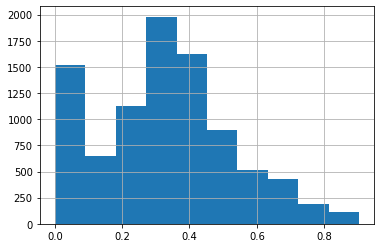

In [5]:
#Check Normal distribution across groups through visual inspection (Assumption 4)
df.GR_RATE.hist()


We assume normal distribution

To test the 5th ANOVA assuption we will use Levene's Test for equality of variances

H0: variances across clusters are equal

HA: variances across clusters are not equal

In [6]:
Cluster_1 = df.loc[df['Cluster'] == '1']
Cluster_2 = df.loc[df['Cluster'] == '2']
Cluster_3 = df.loc[df['Cluster'] == '3']
grad_1 = Cluster_1.GR_RATE
grad_2 = Cluster_2.GR_RATE
grad_3 = Cluster_3.GR_RATE
stats.levene(grad_1, grad_2, grad_3)


/Users/dbeliankou/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/Users/dbeliankou/anaconda3/envs/PythonData/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dbeliankou/anaconda3/envs/PythonData/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

As we see from Levene's test p-value is larger than 0.05, so we keep H0, that mean that variances across clusters are equal.

Assuption 5 is met

In [7]:
df.Cluster = df.Cluster.astype(str)

In [8]:
model = smf.ols('GR_RATE~Cluster', data = df).fit()
table = sm.stats.anova_lm(model, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
Cluster,3.0,25.266913,8.422304,219.9868,9.418352e-138
Residual,9048.0,346.407198,0.038285,NaN,NaN


Here we observe that our p-value is smaller than 0.05, so we will regect H0 and keep HA. It means that there is a significant difference between clusters